In [ ]:
import pandas as pd
import numpy as np

# from IPython.display import display
# pd.options.display.max_columns = 500
pd.options.display.max_rows = 150

%matplotlib inline

In [2]:
train_df = pd.read_csv('../data/train.csv')

In [3]:
df = pd.read_pickle('../train.pkl')

In [28]:
df_test = pd.read_pickle('../test.pkl')

In [29]:
df_test.shape

(1459, 327)

In [30]:
df.shape

(1460, 329)

In [31]:
df_test.columns

Index(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold',
       'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Fence_MnWw', 'MiscFeature_Gar2', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC', 'FireplaceQu_Ex',
       'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA'],
      dtype='object', length=327)

In [32]:
df.columns

Index(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold',
       'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC',
       'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po',
       'FireplaceQu_TA', 'SalePrice', 'GarageCars'],
      dtype='object', length=329)

In [13]:
df['GarageCars'] = train_df['GarageCars']

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
X_1 = df.drop('SalePrice', axis=1)
X_1['Random_Noise'] = np.random.random(size=len(X_1))
y_1 = df.SalePrice
rf = RandomForestRegressor(n_estimators = 5000, max_features=20, oob_score=True)
rf.fit(X_1, y_1)
importance = pd.DataFrame({'feature': X_1.columns, 'f_importance' : rf.feature_importances_})

In [16]:
rf.score(X_1, y_1)

0.9797653880142668

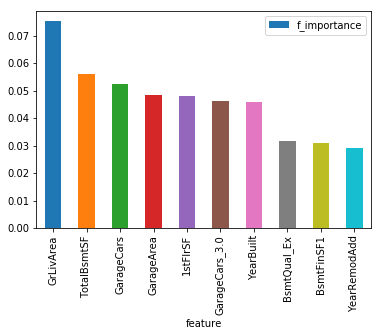

In [46]:
x = importance.sort_values(by='f_importance', ascending=False).reset_index(drop=True)
#x[:10].plot.bar(x='feature', y='f_importance')

In [20]:
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='feature', y='f_importance')

NameError: name 'feature_importance' is not defined

In [19]:
random_importance = importance.f_importance[importance.feature == 'Random_Noise'].item()
features = list(importance.feature[importance.f_importance > random_importance])

In [21]:
from sklearn.linear_model import LinearRegression
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.9418874142456763

In [22]:
lr.predict(test_df)

ValueError: could not convert string to float: 'Normal'

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X, y)
lasso.score(X, y)

C:\Users\Bird_\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.9417662141694374

In [25]:
test_df.shape

(1459, 80)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_1, y_1)
lasso.score(X_1, y_1)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)
#Remember:
#R-squared is a statistical measure of how close the data are to the fitted regression line. 
#It is also known as the coefficient of determination, or the coefficient of multiple determination 
#for multiple regression. 
#100% indicates that the model explains all the variability of the response data around its mean.
#Specifically, l1_ratio = 1 is the lasso penalty. 

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
regr = ElasticNet(random_state=0)
regr.fit(X, y)
ElasticNet(alpha=1.0, fit_intercept=True, l1_ratio=1.0,
      max_iter=1000, random_state=42, selection='random')
regr.score(X,y)



C:\Users\Bird_\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.8017844967424408

In [ ]:
#import matplotlib.pyplot as plt
#plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         #label='Elastic net coefficients')
#plt.plot(coef, '--', color='navy', label='original coefficients')
#plt.legend(loc='best')
#plt.show()

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1,y_1, test_size=0.2, random_state=45)

In [ ]:
alpha1 = 1
enet1 = ElasticNet(alpha=alpha1, l1_ratio=1, max_iter=1000000)
#Specifically, l1_ratio = 1 is the lasso penalty. 
y_pred_enet1 = enet1.fit(X_train1, y_train1).predict(X_test1)
r2_score_enet1 = r2_score(y_test1, y_pred_enet1)
print(enet1)
print("r^2 on test data : %f" % r2_score_enet1)

In [ ]:
#Elastic Net CV without random noise

In [ ]:
from sklearn.linear_model import ElasticNetCV

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=1000000, tol=0.0001, cv=10, n_jobs=-1, selection='cyclic')
cv_model.fit(X, y)
cv_model.score(X, y)
#Passing many l1_ratio to test which gives the best R-squared. 
#The single output is the best R-Squared out of all alpha/lambda

In [ ]:
cv_model2 = ElasticNetCV(l1_ratio=[.1, .25, .5, .7, .9, .95, .99, .995, 1], fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=1000000, cv=10, n_jobs=-1, 
                        selection='cyclic')
cv_model2.fit(X_1, y_1)
cv_model2.score(X_1, y_1)
#Passing many l1_ratio to test which gives the best R-squared. 
#The single output is the best R-Squared out of all alpha/lambda

In [ ]:
cv_model.l1_ratio_

In [ ]:
b = pd.read_pickle('../test.pkl')

In [ ]:
b.shape